***Exploring Diabetes: Data Analysis and Predictive Modeling***

This analysis aims to explore various health factors and how they interact to accurately classify diabetes. Factors like age, gender, BMI, hypertension, heart disease, smoking history, HbA1c levels, and blood glucose levels are all considered. By closely examining these elements, we can uncover patterns and trends in diabetes risk, creating a strong foundation for future studies. This research can also deepen our understanding of how these factors may influence the onset and progression of diabetes, which is essential for improving patient care and outcomes in this critical area of healthcare.

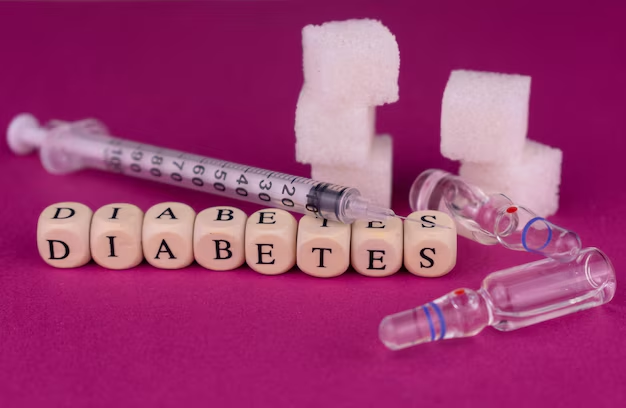

Reasons for using Random Forest:

-Handles Large Datasets: Random Forest works well with big datasets that have many rows and columns, making it a good fit for this data.

-Reduces Overfitting: Random Forest prevents overfitting, a frequent issue with decision trees.

-Works with Different Data Types: Since the data includes both numerical and categorical features, Random Forest is a good choice because it handles mixed data types easily.

-Highlights Feature Importance: Random Forest makes it easier to see which features have the greatest impact.

-Captures Non-linear Relationships: Medical data often has complex, non-linear relationships, and Random Forest’s non-linear nature helps it capture these patterns effectively.

Key Factors

Age: Increased age raises diabetes risk due to lifestyle and health changes.
Gender: Women with gestational diabetes have a higher risk, while some studies suggest men may be slightly more at risk.
BMI: Higher BMI, particularly abdominal fat, often leads to insulin resistance, increasing diabetes likelihood.
Hypertension: High blood pressure frequently coexists with diabetes, with shared risk factors.
Heart Disease: There's a bidirectional link between heart disease and diabetes, as both share risk factors.
Smoking: Smoking increases diabetes risk but can be managed by quitting.
HbA1c Levels: Elevated HbA1c, indicating poor blood sugar control, is linked to diabetes risk.
Blood Glucose: High blood sugar, particularly after fasting or eating, signals a diabetes risk.

In [1]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
#input data
file_path = r"C:\Users\User1\Downloads\Healthcare-Diabetes.csv"
df = pd.read_csv(file_path)

In [3]:

df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [5]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# descriptive statistics of the dataset
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
# (row, columns)
df.shape

(2768, 10)

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Remove rows with missing values
df_dropped = df.dropna()


Missing Values in Each Column:
Series([], dtype: int64)


In [9]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.606936
1    34.393064
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

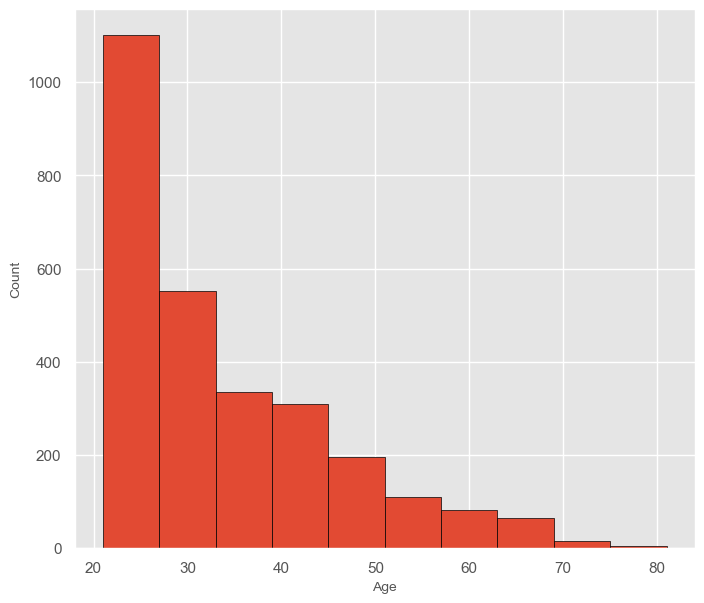

In [10]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [11]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


<Axes: xlabel='Age', ylabel='Density'>

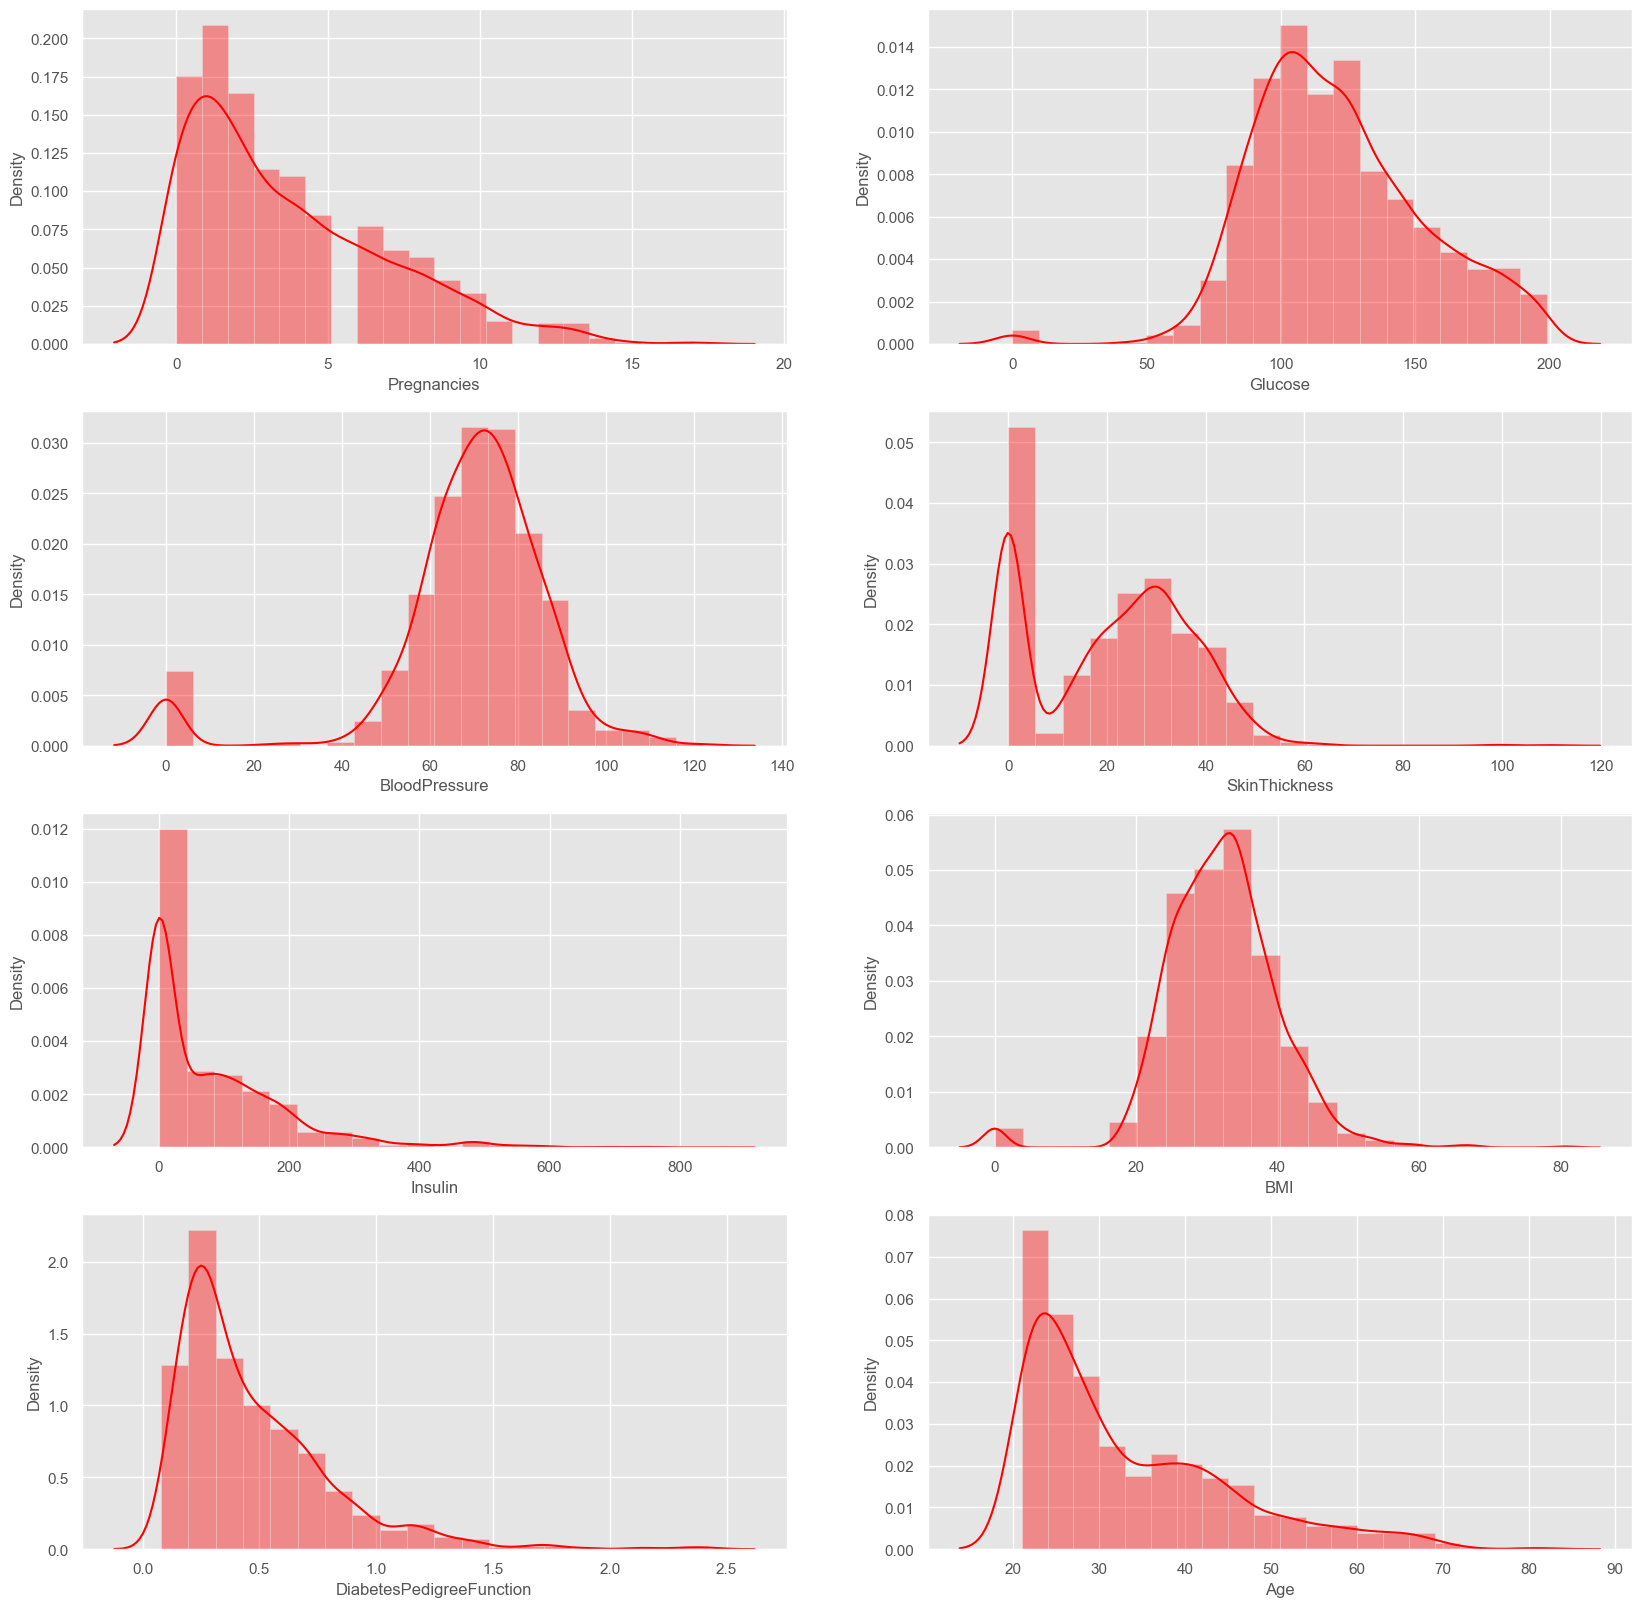

In [12]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [13]:
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]


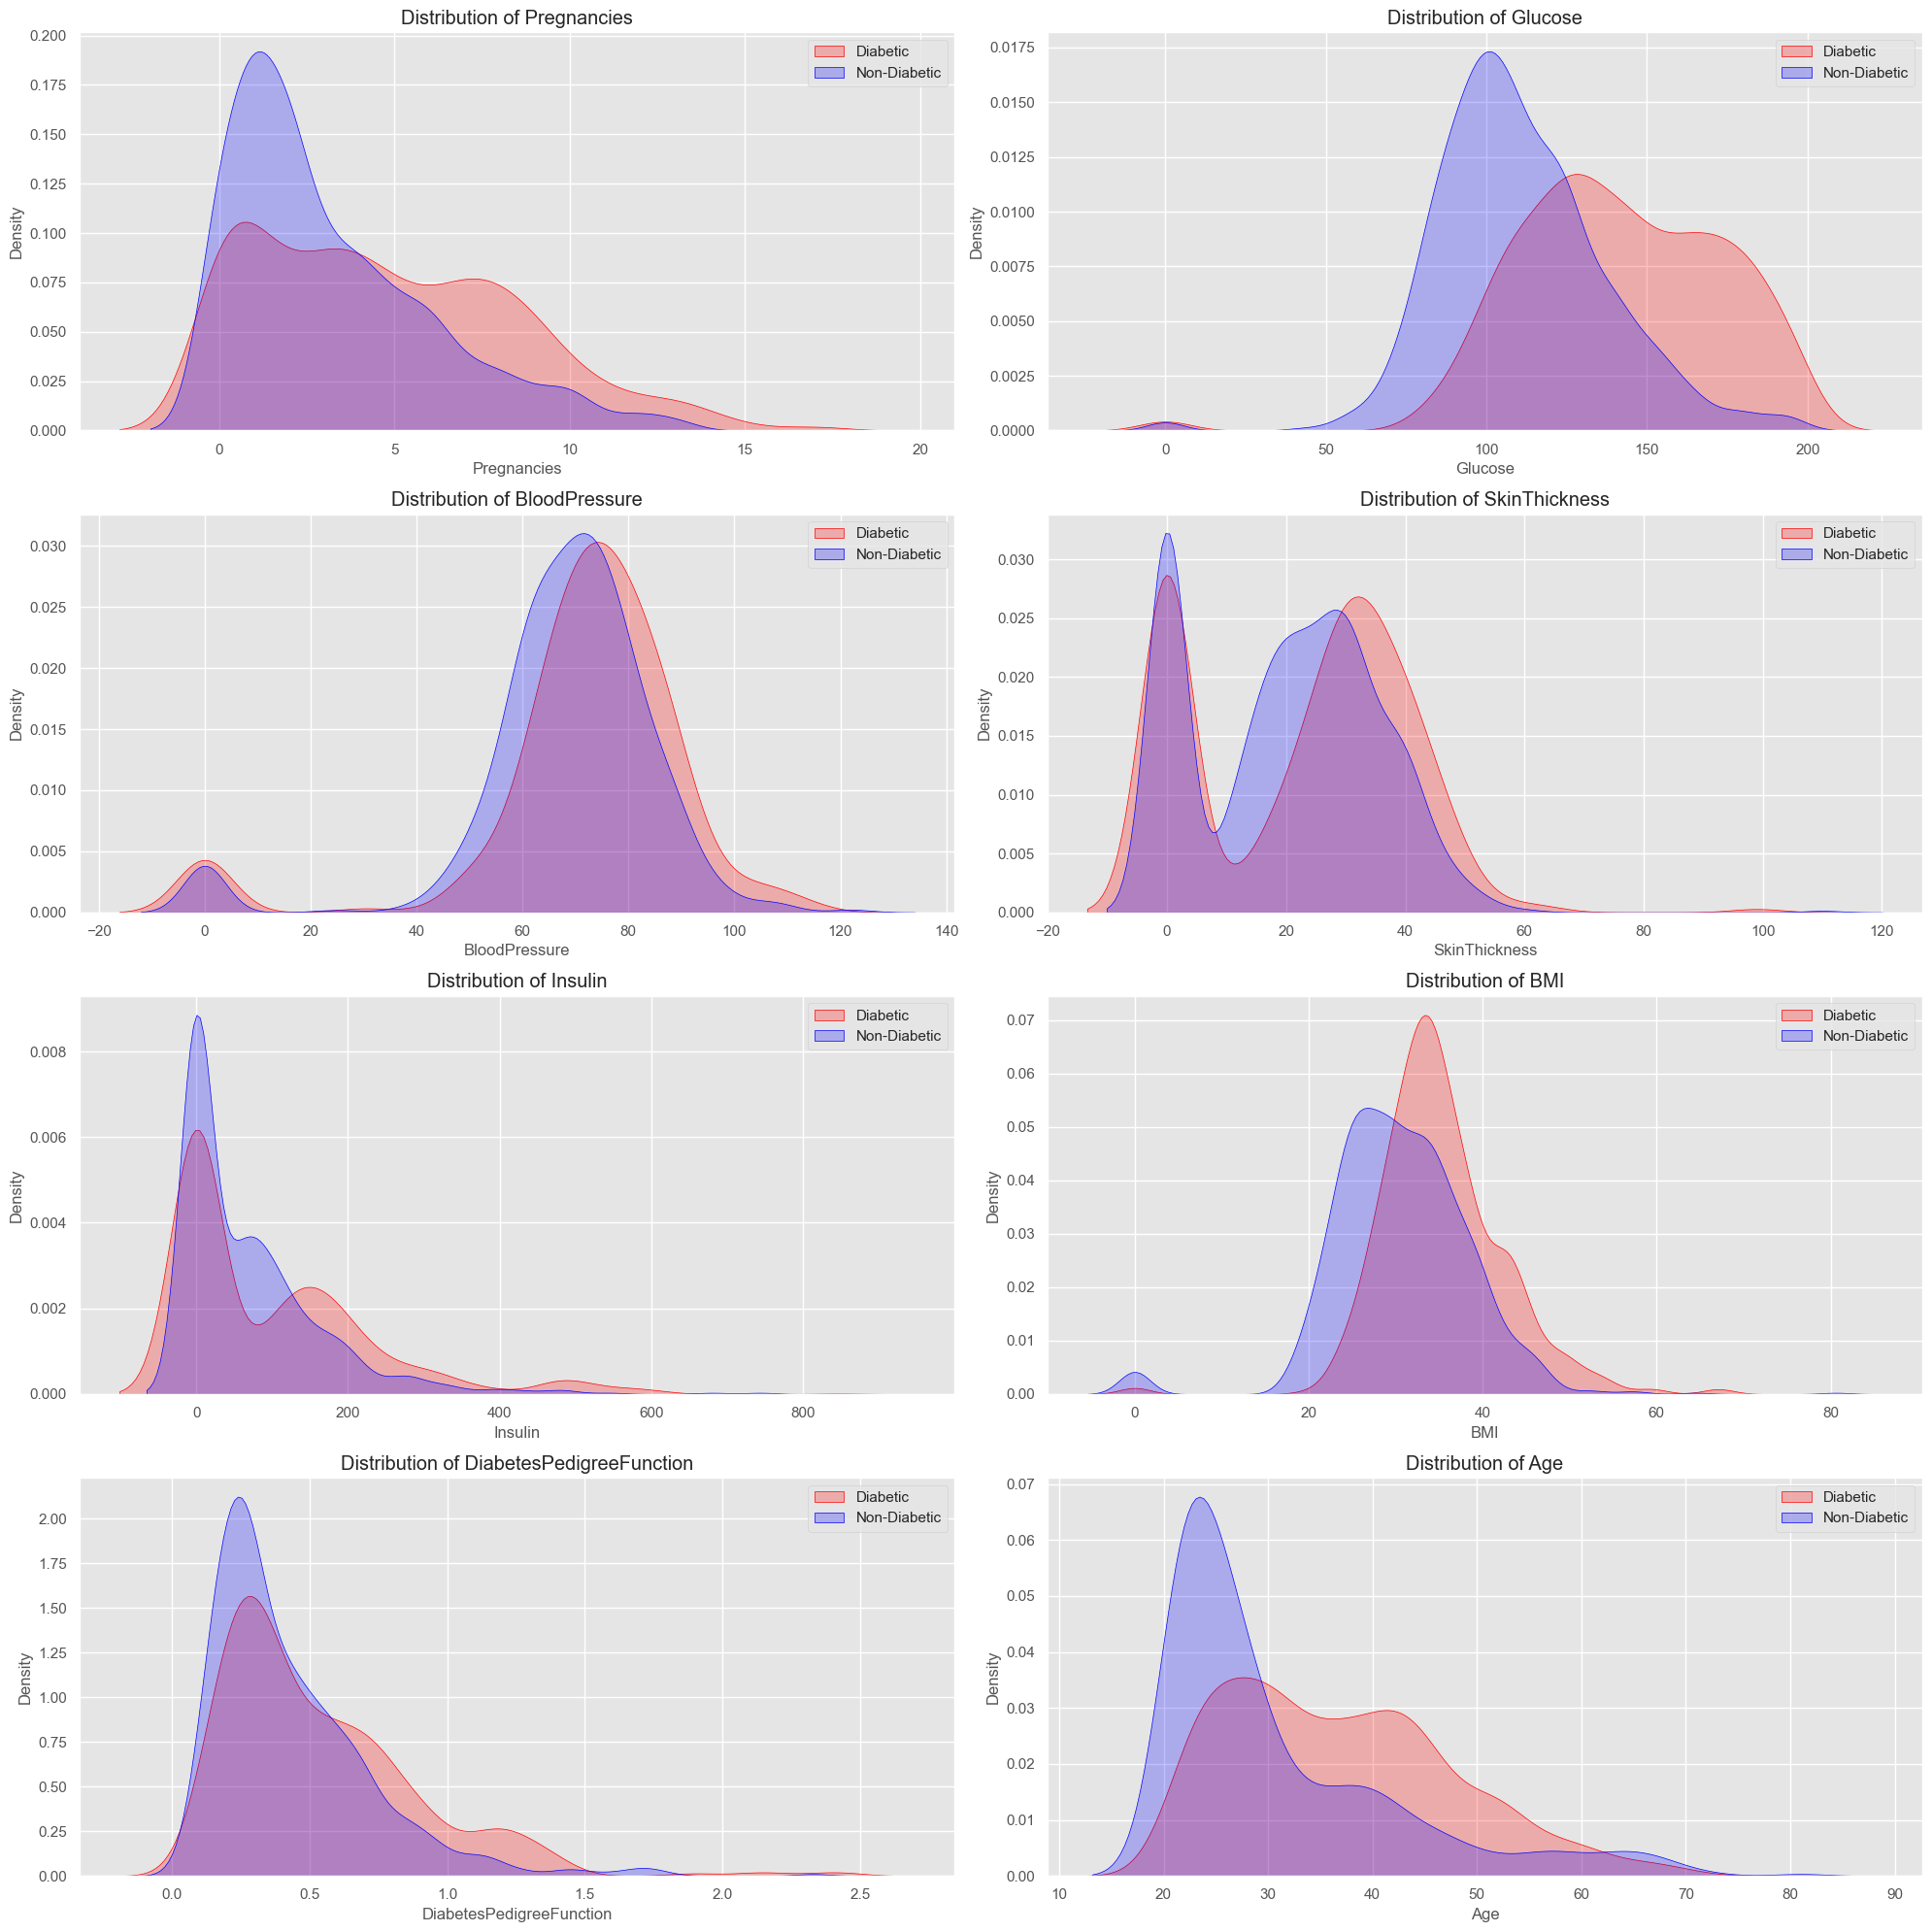

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.kdeplot(diabetic[feature], shade=True, ax=axes[i], label='Diabetic', color='red')
    sns.kdeplot(non_diabetic[feature], shade=True, ax=axes[i], label='Non-Diabetic', color='blue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()


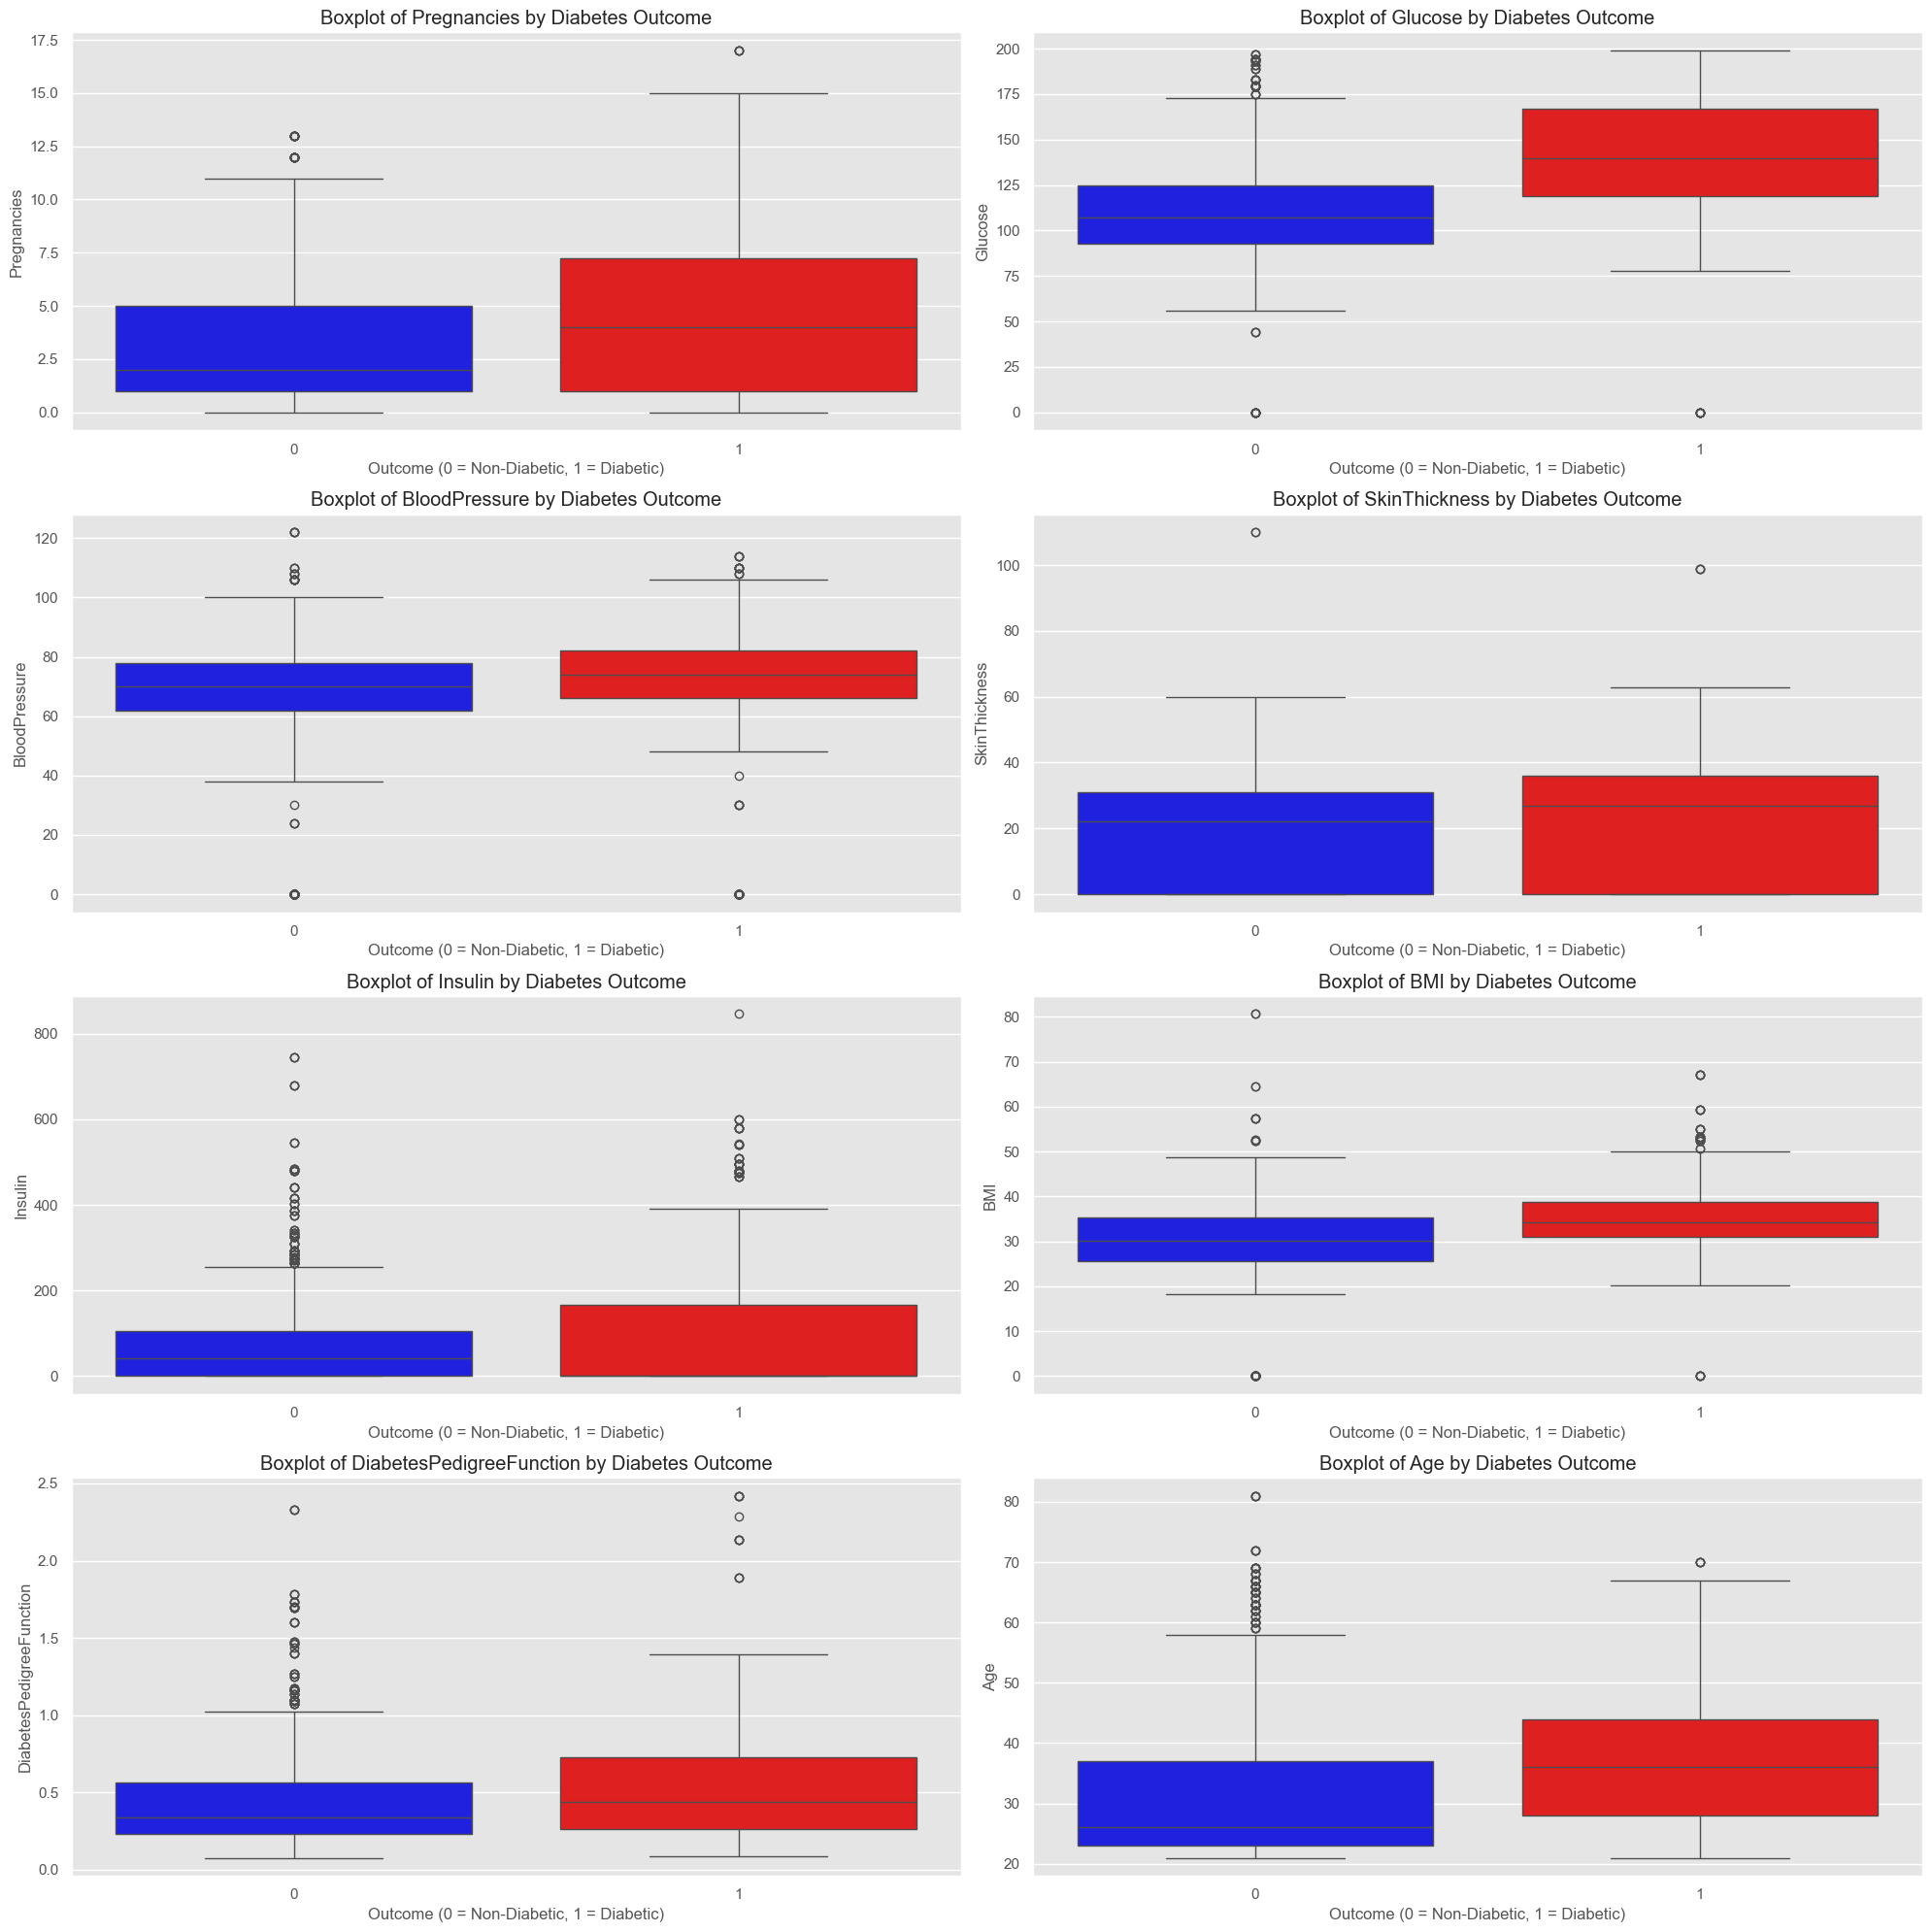

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x='Outcome', y=feature, data=df, ax=axes[i], palette=['blue', 'red'])
    axes[i].set_title(f'Boxplot of {feature} by Diabetes Outcome')
    axes[i].set_xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


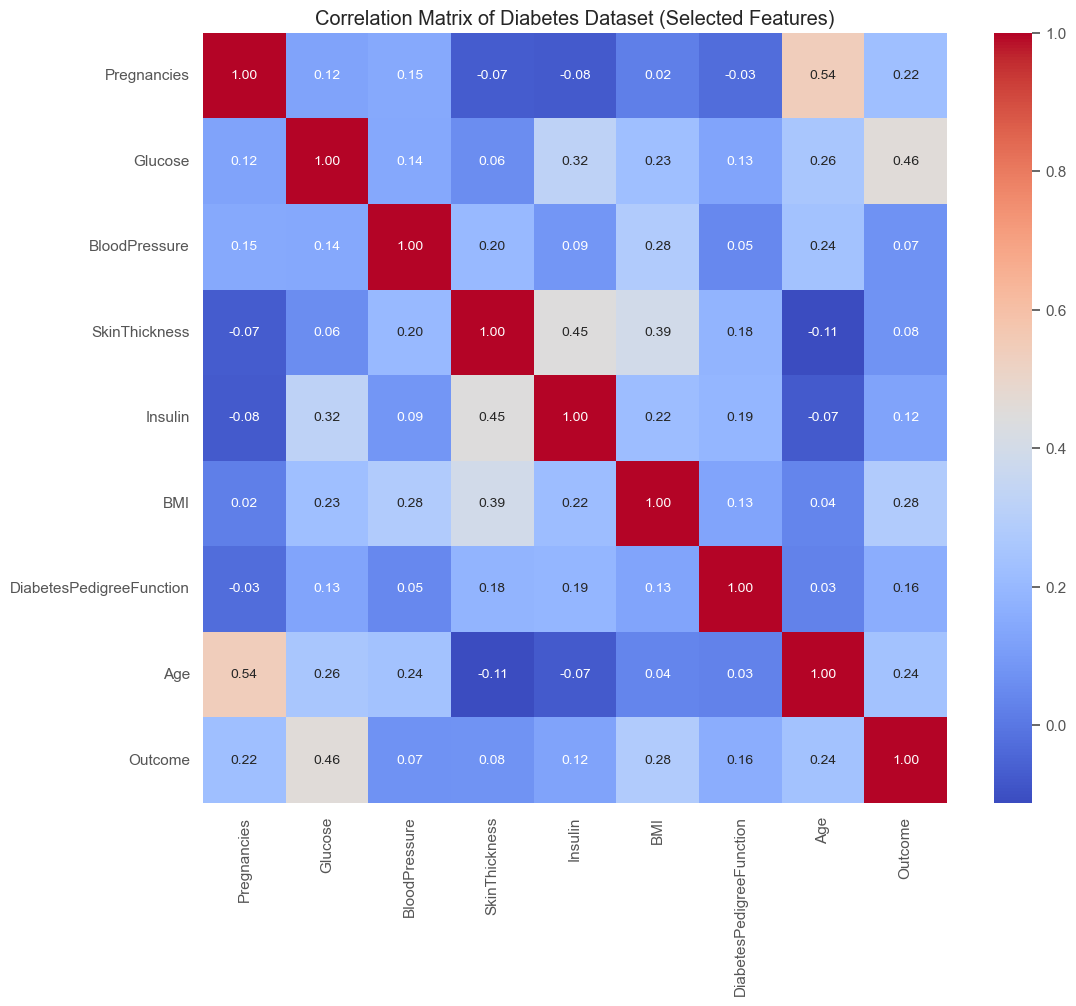

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns excluding 'Id'
relevant_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_relevant = df[relevant_columns]

# Compute the correlation matrix
correlation_matrix = df_relevant.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset (Selected Features)')
plt.show()


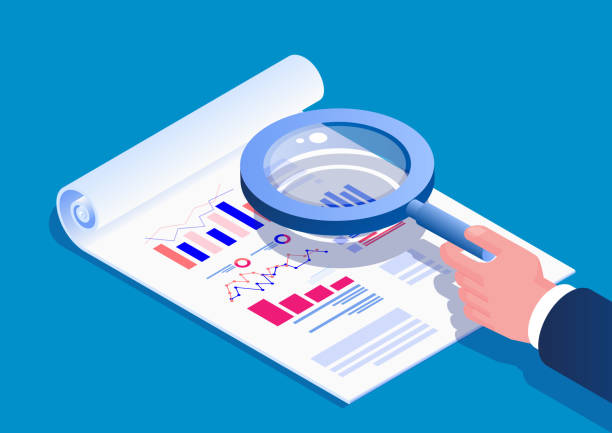

Based on the visualizations, particularly the box plots and heatmap, we can identify the factors most strongly influencing diabetes outcomes:

Glucose has the greatest impact, contributing 46% to diabetes likelihood, followed by BMI at 26%, Age at 24%, and Pregnancies at 22%.
Additional factors include Diabetes Pedigree Function 16%, Insulin levels 12%, Skin Thickness 8%, and Blood Pressure 7%.
These insights highlight the relative influence of each factor in determining diabetes risk, with glucose levels being the most significant predictor.

In [19]:
#Preparing the dataset for machine learning models
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome', 'Id'])  # Features to drop
y = df['Outcome']                        # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
#Use Random Forest to train the training dataset
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



<Axes: >

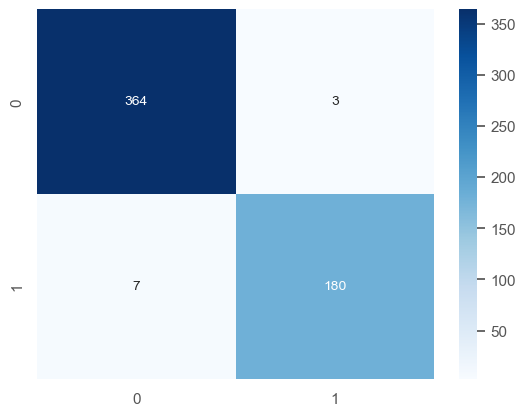

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


In [45]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9534778681120144
0.8646209386281588
[[326  41]
 [ 34 153]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       367
           1       0.79      0.82      0.80       187

    accuracy                           0.86       554
   macro avg       0.85      0.85      0.85       554
weighted avg       0.87      0.86      0.87       554



              precision    recall  f1-score   support

           0       0.91      0.89      0.90       367
           1       0.79      0.82      0.80       187

    accuracy                           0.86       554
   macro avg       0.85      0.85      0.85       554
weighted avg       0.87      0.86      0.87       554



<Axes: >

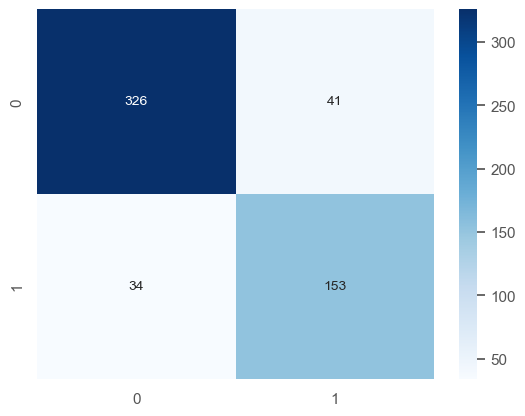

In [47]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


We can see that the Random Forest model works best here.

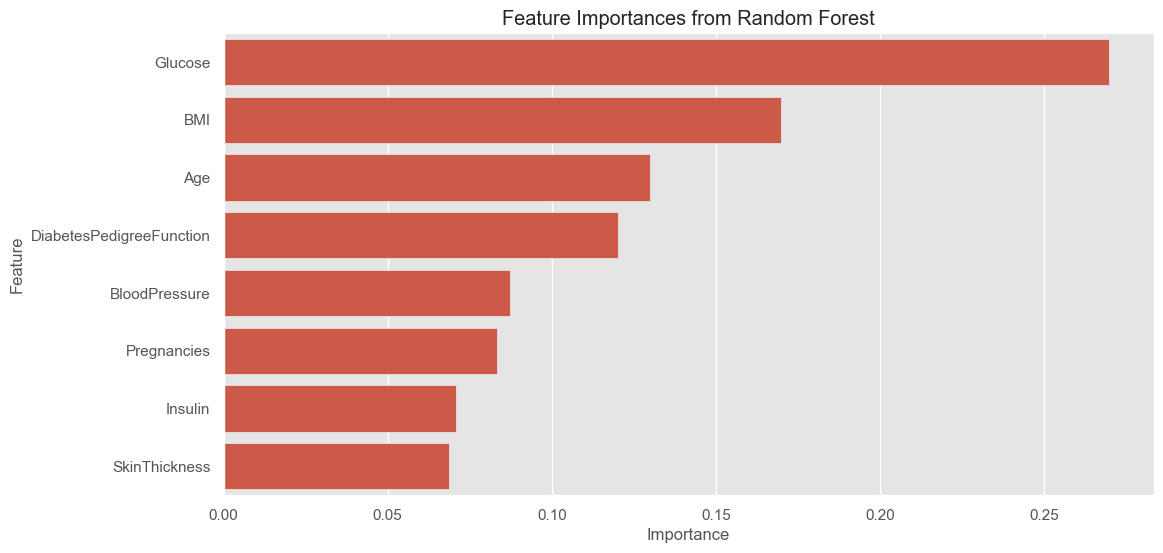

In [50]:
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


These results further emphasise our insights from before.

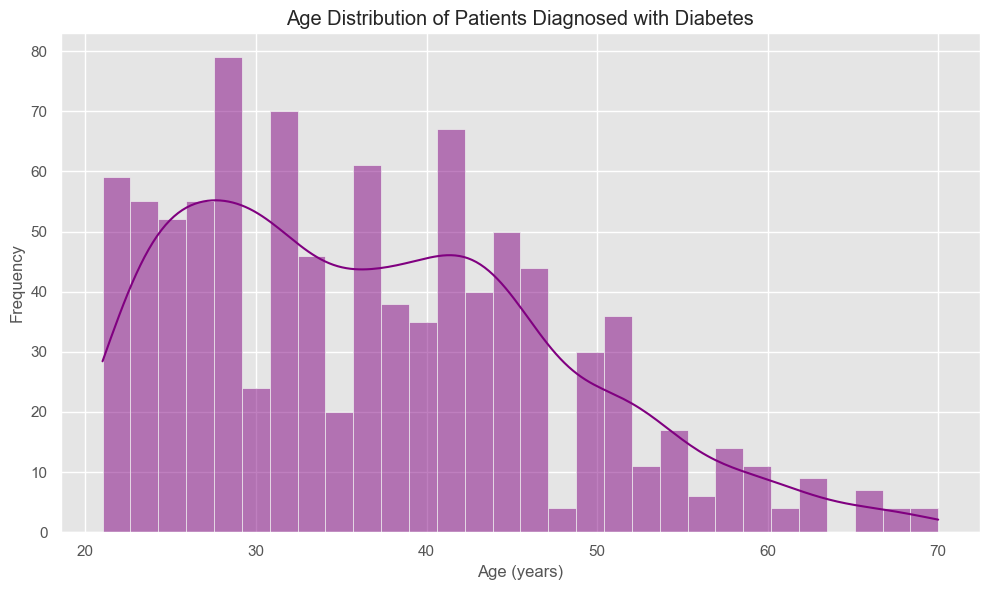

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for patients diagnosed with diabetes
diabetes_df = df[df['Outcome'] == 1]

# Set up the figure
plt.figure(figsize=(10, 6))

# Age Histogram for Diabetic Patients
sns.histplot(diabetes_df['Age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution of Patients Diagnosed with Diabetes')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histogram illustrates the age distribution of patients diagnosed with diabetes. The data reveals the frequency of diagnosed individuals across various age ranges.This information can assist healthcare providers in identifying groups that may require increased monitoring and preventative measures to address diabetes risk.


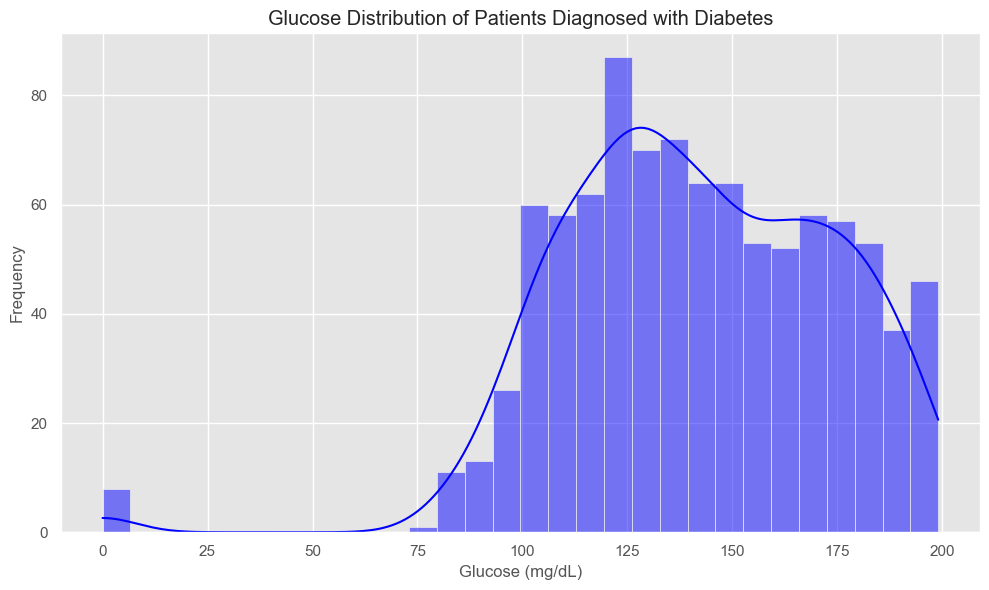

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for patients diagnosed with diabetes
diabetes_df = df[df['Outcome'] == 1]

# Set up the figure for Glucose
plt.figure(figsize=(10, 6))

# Glucose Histogram for Diabetic Patients
sns.histplot(diabetes_df['Glucose'], bins=30, kde=True, color='blue')
plt.title('Glucose Distribution of Patients Diagnosed with Diabetes')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


re

The histogram illustrates the distribution of glucose levels among patients diagnosed with diabetes. It shows the frequency of different glucose levels, emphasizing where most values lie. Understanding this distribution is vital for healthcare providers to assess the blood sugar management of diabetic patients and tailor appropriate treatment strategies.

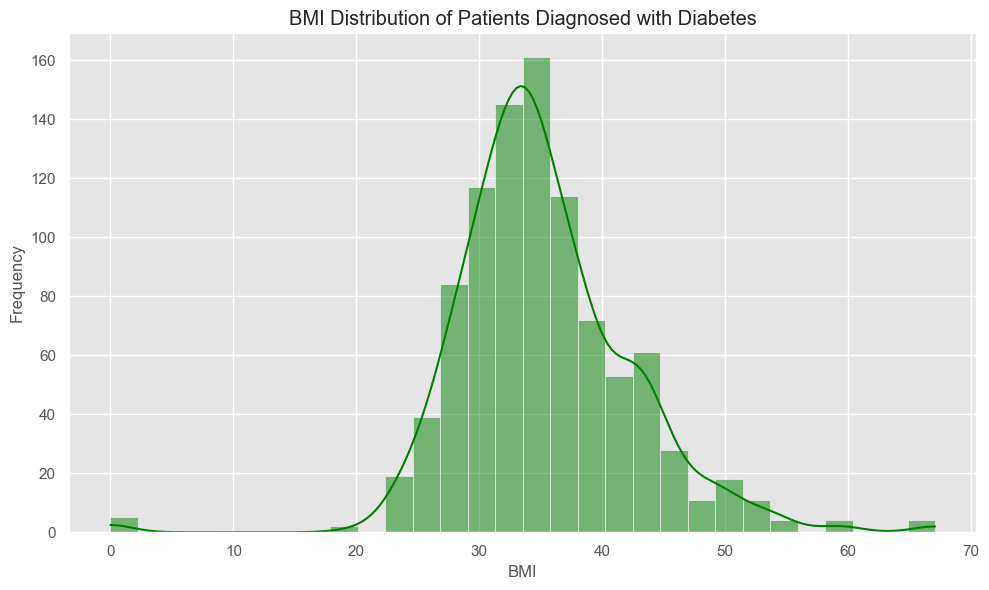

In [65]:
# Set up the figure for BMI
plt.figure(figsize=(10, 6))

# BMI Histogram for Diabetic Patients
sns.histplot(diabetes_df['BMI'], bins=30, kde=True, color='green')
plt.title('BMI Distribution of Patients Diagnosed with Diabetes')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histogram depicts the distribution of Body Mass Index (BMI) among individuals diagnosed with diabetes. It highlights the frequency of various BMI values. This information is critical for identifying potential health risks associated with higher BMI levels.

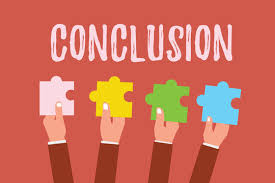

Model Performance:
We evaluated the performance of Random Forest and KNN Models. The results showed that the Random Forest Classifier Performed a lot better than KNN as anticipated at the start, highlighting its capability to handle non-linear relationships.

Feature Importance:
From our analysis, the most significant features affecting diabetes outcomes were identified as follows:

Glucose Levels: 46%
BMI: 26%
Age: 24%

These findings indicate that glucose levels have the highest impact on the likelihood of diabetes, emphasizing the importance of regular monitoring of blood sugar levels in at-risk populations. The significant correlation of BMI with diabetes also suggests that weight management should be a priority in diabetes prevention and management strategies.

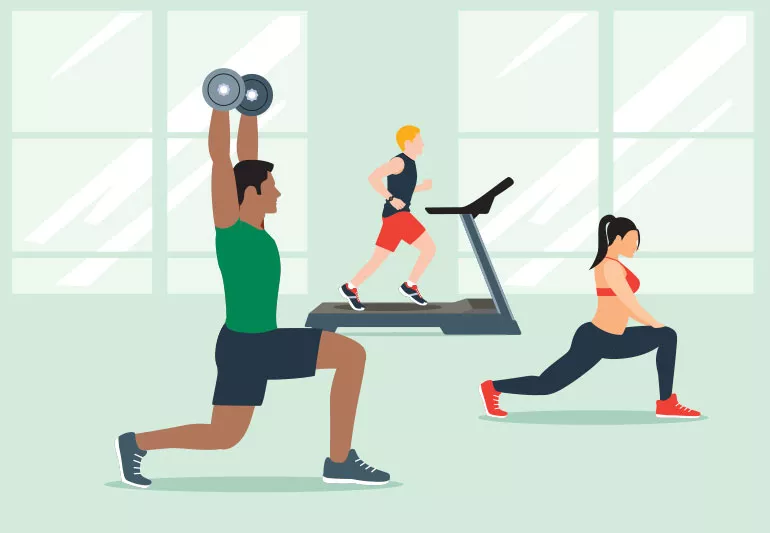

Understanding the role of age can assist healthcare providers in identifying at-risk populations and implementing targeted screening programs for individuals over certain age thresholds.

Next steps

Explore Additional Data
Incorporate External Data Sources: Explore how likely one is to recover from diabetes based on the different factors we explored.